# World Happiness Report

The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/unsdsn/world-happiness' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vedumodi
Your Kaggle Key: ········


100%|██████████| 36.8k/36.8k [00:00<00:00, 22.3MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './world-happiness'

In [5]:
import os
os.listdir(data_dir)

['2015.csv', '2019.csv', '2016.csv', '2018.csv', '2017.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vedu-003/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/vedu-003/zerotopandas-course-project-starter


'https://jovian.ai/vedu-003/zerotopandas-course-project-starter'

## Data Preparation and Cleaning

Here we can show our data and analysis the whole document. And we clean and data perepartion and droping useless value and removing null values.


In [10]:
import pandas as pd
import numpy as np

In [11]:
world_df = pd.read_csv("world-happiness/2015.csv")
print(world_df)

         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561 

In [12]:
world_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [13]:
world_df.tail(10) 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


We are here use .tail() command so its command shows tha bottom of data of our dataset.so we can easily find the data.

In [14]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Here we using the command we can show the range of our dataset , datatypes and we can also show the non values but here ther is no nan values so we can not handle the missing data.

In [15]:
world_df.head(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


here using head command we can show the first 20 data of our dataset and easily read the data.

In [16]:
import jovian

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vedu-003/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/vedu-003/zerotopandas-course-project-starter


'https://jovian.ai/vedu-003/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

In this section, We can deploy the some graph and visualization and analysis the data using the graph so we can easily understand the data from our dataset.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

here we can find the mean, sum , median etc... so we can show our data is good.

In [19]:
world_df['Standard Error'].mean()

0.04788474683544306

In [20]:
world_df['Generosity'].median()

0.21613

In [21]:
world_df['Happiness Score'].sum()

849.3659999999999

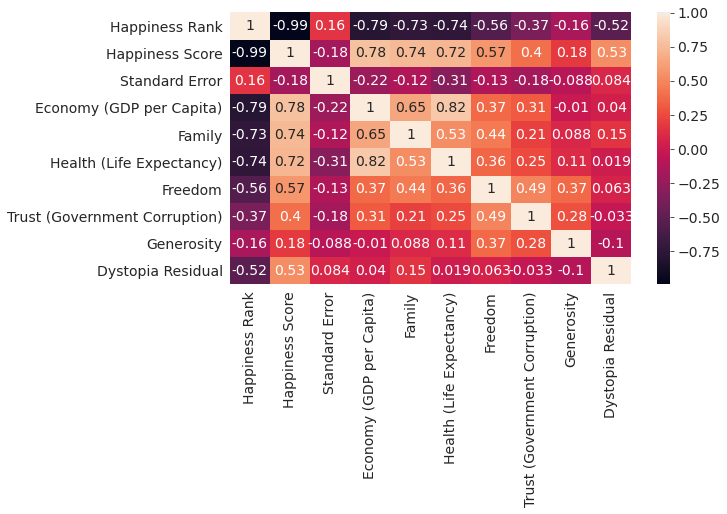

In [22]:
sns.heatmap(world_df.corr(),annot=True);

here we create heatmap ploting so we can show that compare between two colum we can show column Happiness Score and  Happiness score is lowest value and column Econommy and column Health is highest value and similaer column is highest value.

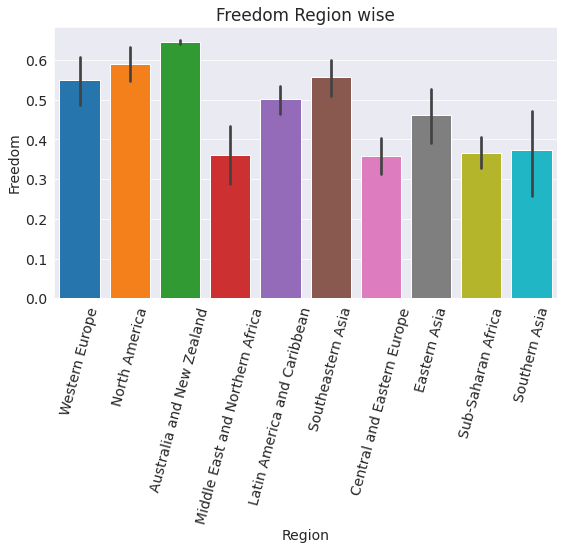

In [23]:
plt.xticks(rotation=75)
plt.title('Freedom Region wise');
sns.barplot(x=world_df.Region,y=world_df.Freedom,saturation=0.9);

From barplot We can Analysis the most higest freefom in Australia and New zealenad around 0.6 up.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


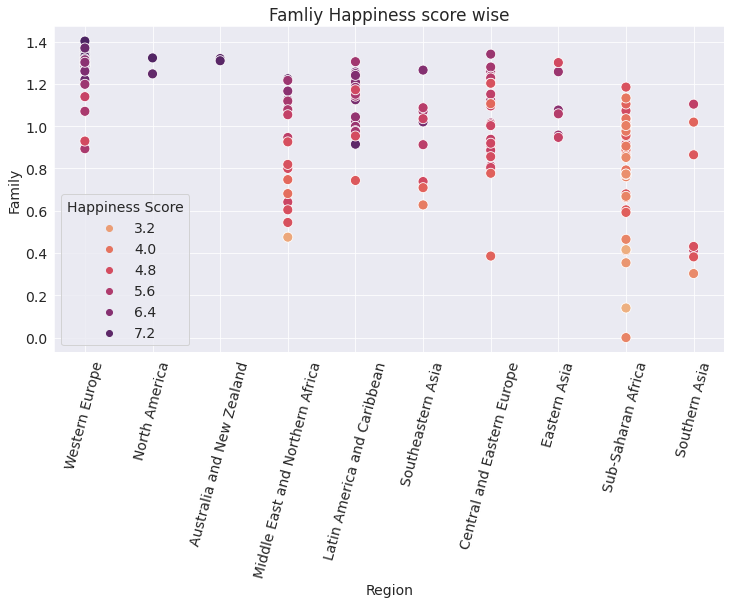

In [24]:
plt.figure(figsize=(12, 6))
plt.title('Famliy Happiness score wise');
plt.xticks(rotation=75)
sns.scatterplot(world_df.Region,world_df.Family,hue=world_df['Happiness Score'],palette='flare',s=100);

From Sctterplot Family is shows by Happiness score with Some diffrernt region Higest happines score is 7.2 this is shows in graph.

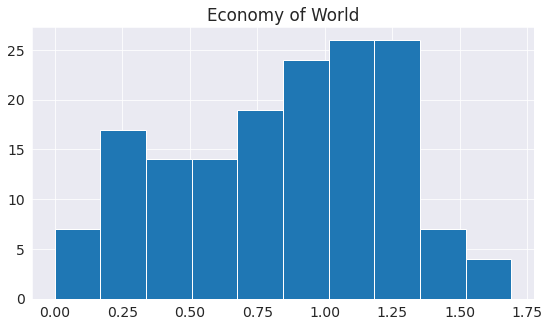

In [25]:
plt.title('Economy of World');
plt.hist(world_df['Economy (GDP per Capita)']);

We can immediately see that the Economy in the range 0.00 - 1.73, and around 25 values are in the range 1.00 - 1.35, which seems to be the most populous bin.

Let us save and upload our work to Jovian before continuing

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


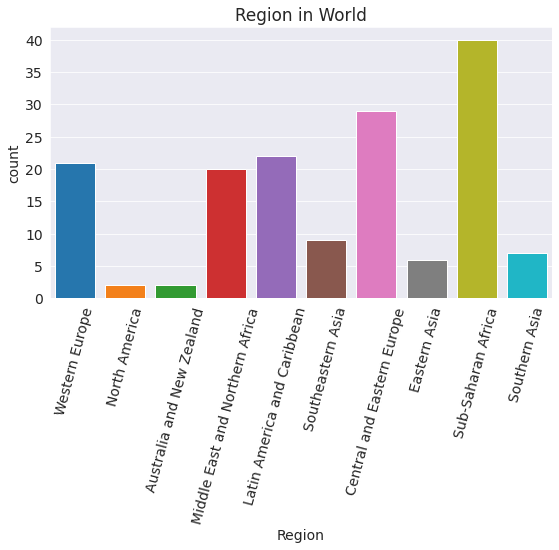

In [26]:
plt.xticks(rotation=75)
sns.countplot(world_df.Region,saturation=0.9);
plt.title('Region in World');

Above the grph we can easily see the higesht region in the world is Sub-saharan afirca and lowest region is north america and  austrialia and new zealand.

In [27]:
import jovian

In [82]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vedu-003/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/vedu-003/zerotopandas-course-project-starter


'https://jovian.ai/vedu-003/zerotopandas-course-project-starter'

## Asking and Answering Questions

TODO - write some explanation here.



#### Q1: Find  the max happiness score which country belong??

In [35]:
max_score = world_df['Happiness Score'].max()
world_df[world_df['Happiness Score'] == max_score].Country

0    Switzerland
Name: Country, dtype: object

#### Q2: Find the number of Region Which are North America??

In [38]:
World_region=world_df[world_df.Region=='North America']
print(World_region)

          Country         Region  Happiness Rank  Happiness Score  \
4          Canada  North America               5            7.427   
14  United States  North America              15            7.119   

    Standard Error  Economy (GDP per Capita)   Family  \
4          0.03553                   1.32629  1.32261   
14         0.03839                   1.39451  1.24711   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
4                    0.90563  0.63297                        0.32957   
14                   0.86179  0.54604                        0.15890   

    Generosity  Dystopia Residual  
4      0.45811            2.45176  
14     0.40105            2.51011  


In [39]:
y=World_region.Region.count()

In [41]:
print("There are {} number of region which are North America.".format(y))

There are 2 number of region which are North America.


#### Q3: How many countries had Dystopia Residual above 2.5??

In [42]:
n1=world_df['Dystopia Residual']>2.5

In [45]:
n2=n1.sum()

In [46]:
print("There are {} contries which is dystopia Residual above 2.5.".format(n2))

There are 35 contries which is dystopia Residual above 2.5.


#### Q4: Find the unique country and show the list of country??

In [69]:
world_c = world_df.Country.unique()

In [70]:
print(world_c)

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'
 'Philip

In [ ]:
x = world_df.Country.count()

In [76]:
print("There are {} unique country in the dataset.".format(x))

There are 158 unique country in the dataset.


#### Q5: Show the region  by Happines Score.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


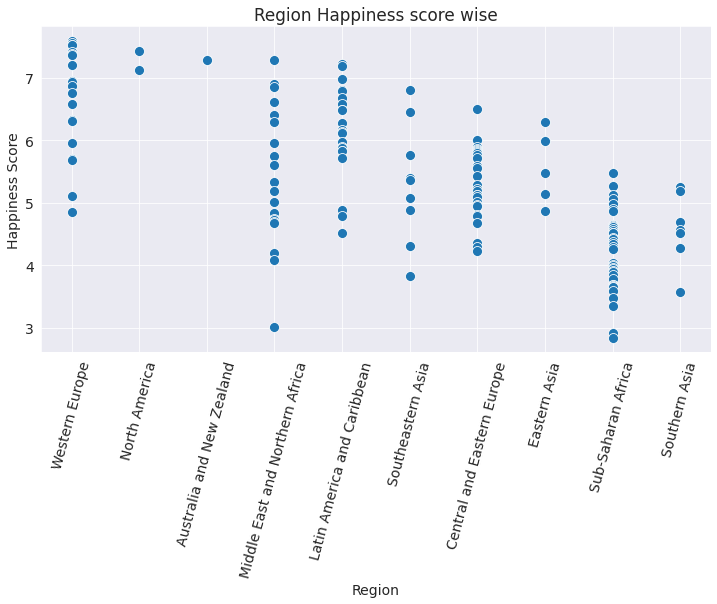

In [81]:
plt.figure(figsize=(12, 6))
plt.title('Region Happiness score wise');
plt.xticks(rotation=75)
sns.scatterplot(world_df.Region,world_df['Happiness Score'],palette='flare',s=100);

Let us save and upload our work to Jovian before continuing.

In [59]:
import jovian

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vedu-003/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/vedu-003/zerotopandas-course-project-starter


'https://jovian.ai/vedu-003/zerotopandas-course-project-starter'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [84]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [33]:
import jovian

In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vedu-003/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/vedu-003/zerotopandas-course-project-starter


'https://jovian.ai/vedu-003/zerotopandas-course-project-starter'